In [1]:
import numpy as np
import pickle
from deepprojection.utils import ConfusionMatrix

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# fl_pickle = 'pdb_photon_res_dict.03.v3.pickle'
# fl_pickle = 'pdb_photon_res_dict.v3.pickle'
# fl_pickle = 'confusion_matrix.2022_1227_2300_00.epoch_247.pickle'
# fl_pickle = 'confusion_matrix.2022_1227_2301_12.epoch_142.pickle'
# fl_pickle = 'confusion_matrix.2023_0101_0856_44.epoch_71.v1.pickle'
# fl_pickle = 'confusion_matrix.2022_1230_1009_49.epoch_113.pickle'
# fl_pickle = 'confusion_matrix.2022_1225_0931_12.epoch_266.pickle'
fl_pickle = 'confusion_matrix.2022_1227_2301_12.epoch_142.pickle'
with open(fl_pickle, 'rb') as handle:
    res_dict = pickle.load(handle)

In [ ]:
res = res_dict['6N38'][0][1]

In [ ]:
cm = ConfusionMatrix(res)

In [ ]:
cm.get_metrics(1)

In [ ]:
pdb = '6N38'
photon_list = [ res[0] for res in res_dict[pdb] ]
cm_list = [ ConfusionMatrix(res[1]).get_metrics(1) for res in res_dict[pdb] ]

In [ ]:
x = photon_list
y = [ cm[0] for cm in cm_list ]

plt.figure(figsize=(5,4))
plt.plot(x, y)

In [ ]:
plt.figure(figsize=(10,9))
for pdb in res_dict.keys():
    photon_list = [ res[0] for res in res_dict[pdb] ]
    cm_list = [ ConfusionMatrix(res[1]).get_metrics(1) for res in res_dict[pdb] ]
    
    x = photon_list
    y = [ cm[0] for cm in cm_list ]

    plt.plot(x, y)
plt.suptitle('Acc (single-hit)')

In [ ]:
import random
random.seed(0)

plt.figure(figsize=(15,4))
for pdb in random.sample(res_dict.keys(), 20):
    photon_list = [ res[0] for res in res_dict[pdb] ]
    cm_list = [ ConfusionMatrix(res[1]).get_metrics(1) for res in res_dict[pdb] ]
    
    x = photon_list
    y = [ cm[0] for cm in cm_list ]

    plt.plot(x, y)

In [ ]:
import random
random.seed(0)

plt.figure(figsize=(15,4))
for pdb in random.sample(res_dict.keys(), 10):
    photon_list = [ res[0] for res in res_dict[pdb] ]
    cm_list = [ ConfusionMatrix(res[1]).get_metrics(1) for res in res_dict[pdb] ]
    
    x = photon_list
    y = [ cm[4] for cm in cm_list ]

    plt.plot(x, y)

In [ ]:
plt.figure(figsize=(15,8))
for pdb in res_dict.keys():
    photon_list = [ res[0] for res in res_dict[pdb] ]
    cm_list = [ ConfusionMatrix(res[1]).get_metrics(1) for res in res_dict[pdb] ]
    
    x = photon_list
    y = [ cm[2] for cm in cm_list ]

    plt.plot(x, y)
plt.suptitle('F1 (single-hit)')
# plt.xlim([1.5,2.0])

In [ ]:
plt.figure(figsize=(15,4))
for pdb in res_dict.keys():
    photon_list = [ res[0] for res in res_dict[pdb] ]
    cm_list = [ ConfusionMatrix(res[1]).get_metrics(1) for res in res_dict[pdb] ]
    
    x = photon_list
    y = [ cm[4] for cm in cm_list ]

    plt.plot(x, y)
plt.suptitle('F1 (single-hit)')
# plt.xlim([1.5,2.0])

In [ ]:
import numpy as np
data = np.random.poisson(lam = -1e0, size = 1000)
hy, hx = np.histogram(data, bins = 50)

plt.figure(figsize=(15,4))
plt.plot(hx[:-1], hy)

## Viz all

Text(0, 0.5, 'Accuracy')

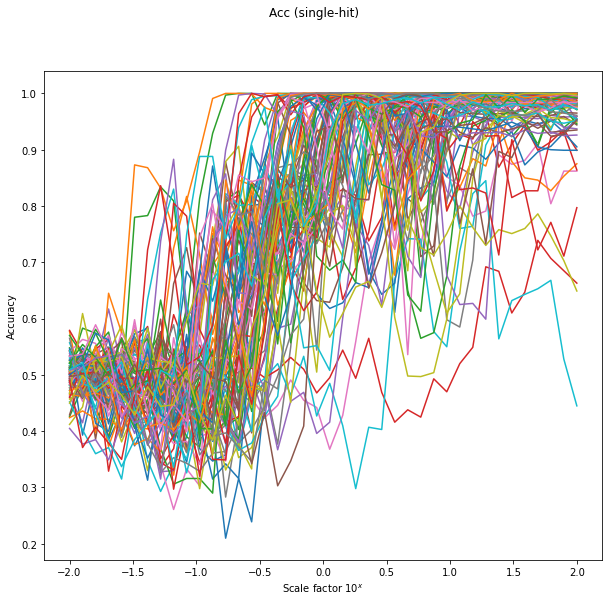

In [4]:
pdb_hard_list = []
acc_list = []
plt.figure(figsize=(10,9))
for pdb in res_dict.keys():
    photon_list = [ res[0] for res in res_dict[pdb] ]
    cm_list = [ ConfusionMatrix(res[1]).get_metrics(1) for res in res_dict[pdb] ]
    
    x = photon_list
    y = [ cm[0] for cm in cm_list ]
    
    if np.mean(y[-5:]) < 0.9: pdb_hard_list.append(pdb)
    
    acc_list.append(y)

    plt.plot(x, y)
plt.suptitle('Acc (single-hit)')
plt.xlabel('Scale factor $10^x$')
plt.ylabel('Accuracy')

In [5]:
pdb_hard_list

['6OR5', '3CW1', '3DG5', '2HJR', '6GC4', '4B2Q', '7OF0']

In [6]:
data = np.array(acc_list)
data.shape

(100, 40)

Text(0, 0.5, 'Accuracy')

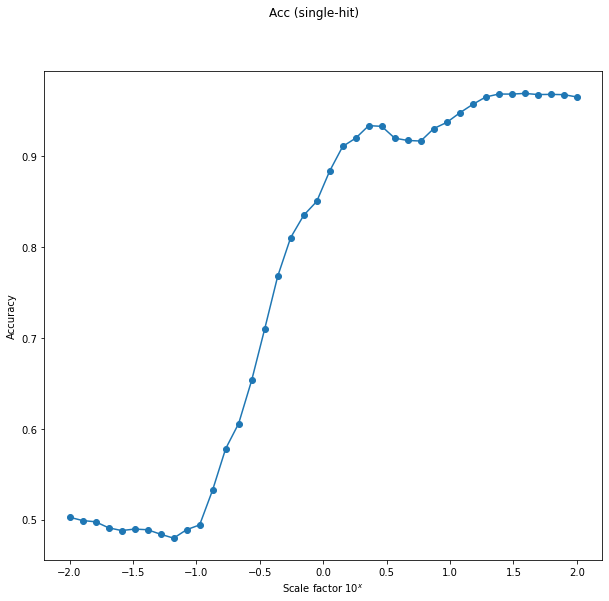

In [7]:
plt.figure(figsize=(10,9))
plt.plot(photon_list, data.mean(axis = 0), 'o-')
plt.suptitle('Acc (single-hit)')
plt.xlabel('Scale factor $10^x$')
plt.ylabel('Accuracy')

In [8]:
np.argwhere(np.array(photon_list) == 0.0)

array([], shape=(0, 1), dtype=int64)

In [ ]:
np.array(photon_list)[38]

In [ ]:
10**0.3

In [9]:
data_mean = data.mean(axis = 0)

In [10]:
data_mean[38]

0.9675400000000001

In [11]:
u, s, vh = np.linalg.svd( data.T, full_matrices = False )

In [12]:
def reverse_sign(u, vh, rank):
    u[:, rank]  = - u[:, rank]
    vh[rank, :] = -vh[rank, :]
    return None

In [13]:
reverse_sign(u, vh, 0)

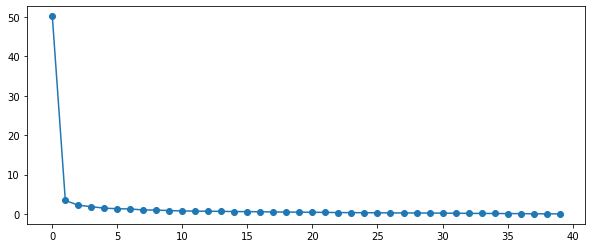

In [14]:
plt.figure(figsize=(10,4))
plt.plot(s, 'o-')

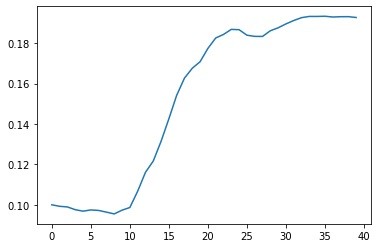

In [15]:
plt.plot(u[:, 0])

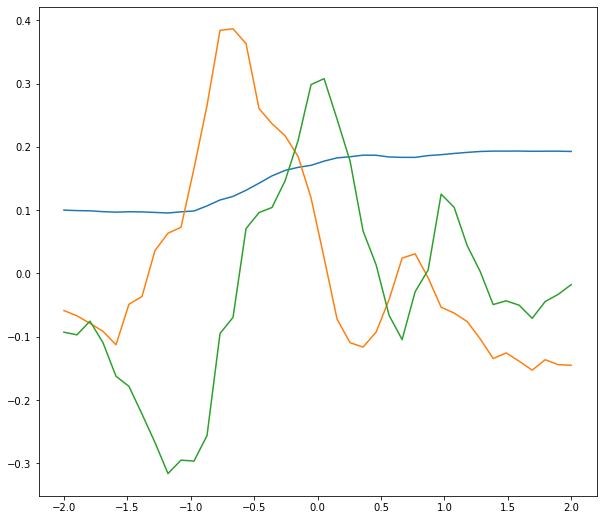

In [31]:
plt.figure(figsize=(10,9))
for each_u in u[:,:3].T:
    plt.plot(photon_list, each_u)

In [17]:
u.shape

(40, 40)

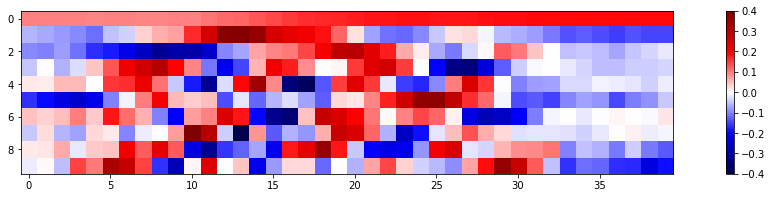

In [18]:
plt.figure(figsize=(19,3))
vmin = u.mean() - 0.5 * u.std()
vmax = u.mean() + 4.0 * u.std()
plt.imshow(u[:,:10].T, vmin = vmin, vmax = vmax)
plt.clim((-0.4, 0.4))
plt.set_cmap('seismic')
plt.colorbar()
# plt.gca().set_xticks([f"{i:.1f}" for i in photon_list])
# plt.gca().set_xticklabels([f"{i:.1f}" for i in photon_list])

In [19]:
# Calculate the coefficients...
c = np.matmul(np.diag(s), vh)

# Standardize u and c and assign units...
u_ave = np.sqrt(u.shape[0])
c = c / u_ave

In [20]:
c.shape

(40, 100)

In [21]:
c[0], u[0]

(array([0.77097461, 0.83617485, 0.88062219, 0.76654098, 0.79673344,
        0.78061148, 0.64592877, 0.76698817, 0.78281692, 0.77421501,
        0.79146526, 0.83435224, 0.79858159, 0.75436839, 0.74309747,
        0.80587896, 0.79318164, 0.74843149, 0.75952571, 0.82701821,
        0.79767826, 0.83247829, 0.80335446, 0.52437841, 0.78943424,
        0.78676036, 0.82088715, 0.72572051, 0.81706341, 0.53641194,
        0.77568781, 0.81157427, 0.78595477, 0.80889266, 0.8574365 ,
        0.85282327, 0.79987385, 0.80505401, 0.76925834, 0.81305112,
        0.79826233, 0.8598784 , 0.81297508, 0.83153316, 0.79367901,
        0.80192627, 0.814623  , 0.78065116, 0.79152447, 0.74102787,
        0.74159532, 0.81218828, 0.73135166, 0.82966023, 0.75922441,
        0.80856094, 0.79430301, 0.79728323, 0.83875205, 0.83108566,
        0.80193131, 0.86112115, 0.84826564, 0.79254987, 0.65521165,
        0.78196807, 0.80252956, 0.81116083, 0.71096991, 0.86343605,
        0.85345409, 0.84521885, 0.79579136, 0.82

In [22]:
c.shape

(40, 100)

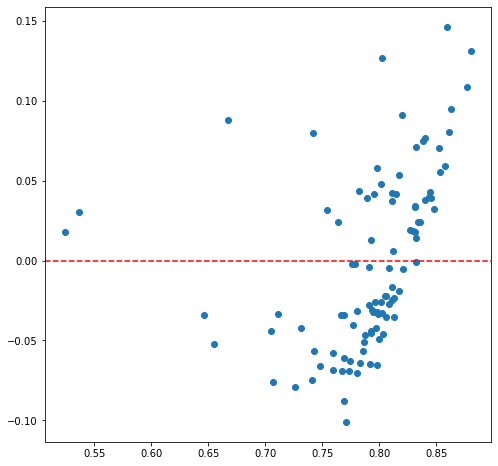

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(c[0],c[1])
plt.axhline(y = 0., color = 'r', linestyle = '--')

In [69]:
c[1] > 0, c[1].shape, (c[1] > 0).sum()

(array([False,  True,  True, False, False, False, False, False, False,
        False, False,  True, False,  True, False, False, False, False,
        False,  True, False,  True, False,  True,  True, False, False,
        False, False,  True, False,  True, False, False,  True,  True,
        False, False, False, False, False,  True, False,  True, False,
        False,  True, False, False, False,  True,  True, False,  True,
        False, False, False, False,  True,  True,  True,  True,  True,
        False, False,  True, False, False, False,  True,  True,  True,
         True,  True,  True, False, False,  True, False,  True,  True,
        False, False, False,  True,  True,  True, False,  True, False,
        False,  True, False,  True,  True, False,  True,  True, False,
         True]),
 (100,),
 43)

#### $c_1$

In [103]:
res1 = u[:, 1:1+1] @ c[1:1+1]
res1.shape

(40, 100)

In [104]:
res0 = u[:, 0:0+1] @ c[0:0+1]
res0.shape

(40, 100)

In [ ]:
idx = 10
data = res0[:, idx] + res1[:, idx]
plt.figure(figsize=(10,9))
plt.plot(photon_list, data.T)

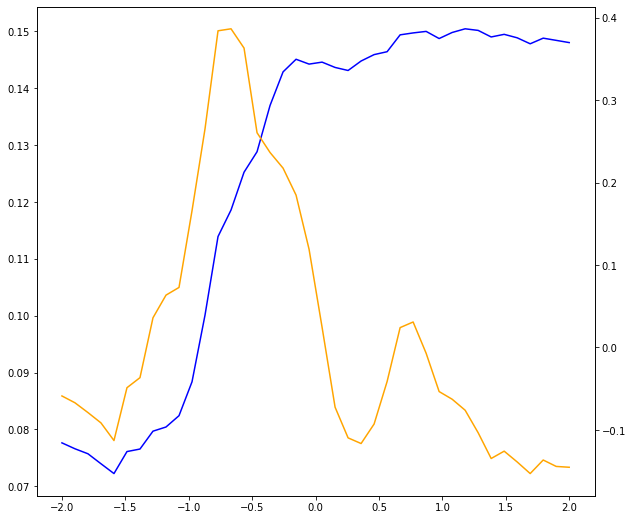

In [110]:
data = res0 + res1
cond = c[1] > 0
data_c1_pos = data[:, cond]
fig, ax1 = plt.subplots(figsize=(10,9))
ax2 = ax1.twinx()
ax1.plot(photon_list, data_c1_pos.mean(axis = 1), color = 'blue')
ax2.plot(photon_list, u[:, 1], color = 'orange')

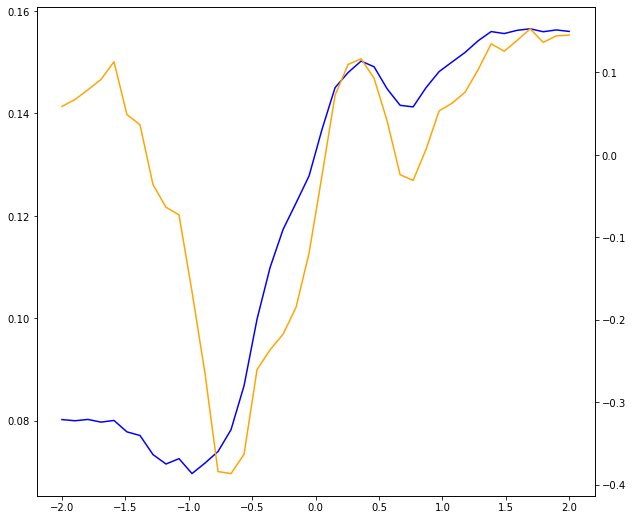

In [111]:
data = res0 + res1
cond = c[1] > 0
cond = ~cond
data_c1_pos = data[:, cond]
fig, ax1 = plt.subplots(figsize=(10,9))
ax2 = ax1.twinx()
ax1.plot(photon_list, data_c1_pos.mean(axis = 1), color = 'blue')
ax2.plot(photon_list, -u[:, 1], color = 'orange')

#### $c_2$

In [89]:
cidx = 2
res2 = u[:, cidx:cidx+1] @ c[cidx:cidx+1]
res2.shape

(40, 100)

In [90]:
cidx = 0
res0 = u[:, cidx:cidx+1] @ c[cidx:cidx+1]
res0.shape

(40, 100)

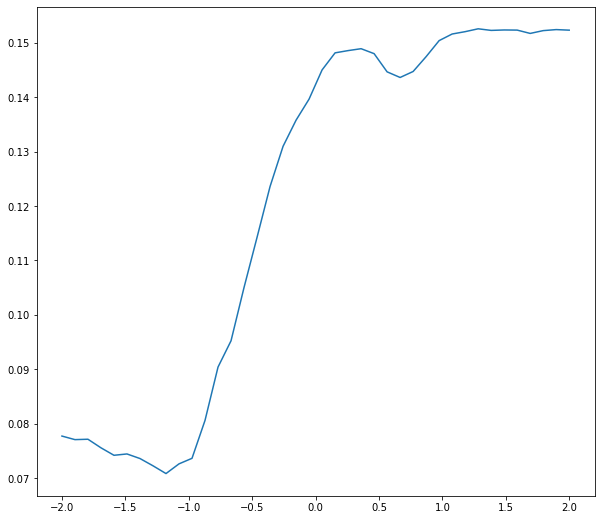

In [91]:
idx = 10
data = res0[:, idx] + res2[:, idx]
plt.figure(figsize=(10,9))
plt.plot(photon_list, data.T)

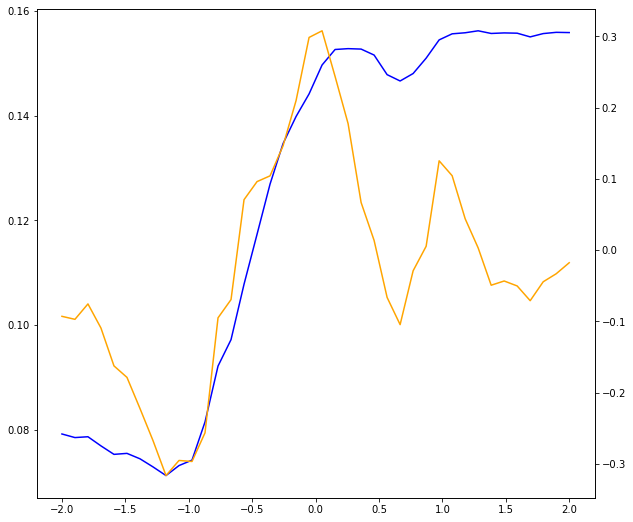

In [101]:
data = res0 + res2
cond = c[2] > 0
data_c2_pos = data[:, cond]
fig, ax1 = plt.subplots(figsize=(10,9))
ax2 = ax1.twinx()
ax1.plot(photon_list, data_c2_pos.mean(axis = 1), color = 'blue')
ax2.plot(photon_list, u[:, 2], color = 'orange')

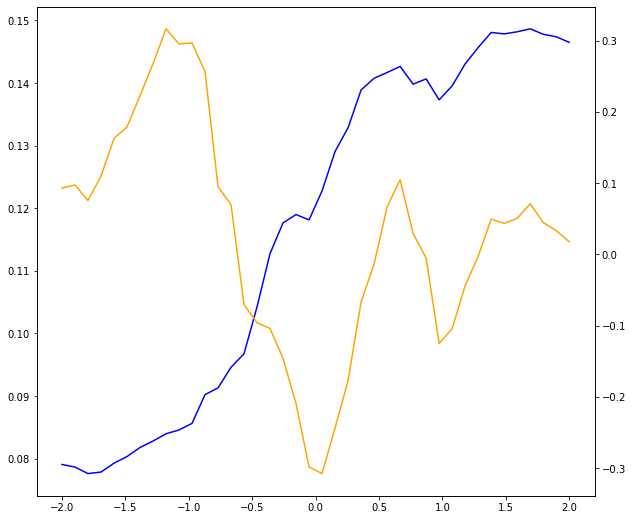

In [112]:
data = res0 + res2
cond = c[2] > 0
cond = ~cond
data_c2_pos = data[:, cond]
fig, ax1 = plt.subplots(figsize=(10,9))
ax2 = ax1.twinx()
ax1.plot(photon_list, data_c2_pos.mean(axis = 1), color = 'blue')
ax2.plot(photon_list, -u[:, 2], color = 'orange')

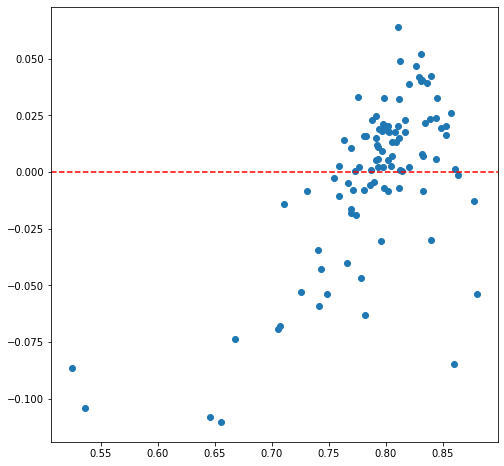

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(c[0],c[2])
plt.axhline(y = 0., color = 'r', linestyle = '--')

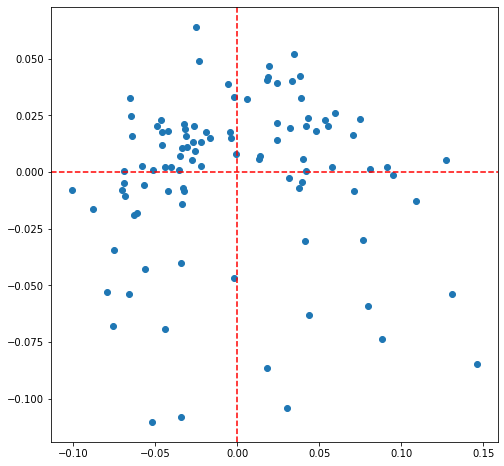

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(c[1],c[2])
plt.axvline(x = 0., color = 'r', linestyle = '--')
plt.axhline(y = 0., color = 'r', linestyle = '--')

In [ ]:
pdb_hard_list = []
f1_list = []
plt.figure(figsize=(10,9))
for pdb in res_dict.keys():
    photon_list = [ res[0] for res in res_dict[pdb] ]
    cm_list = [ ConfusionMatrix(res[1]).get_metrics(1) for res in res_dict[pdb] ]
    
    x = photon_list
    y = [ cm[4] for cm in cm_list ]
    
    if np.mean(y[-5:]) < 0.9: pdb_hard_list.append(pdb)
    
    f1_list.append(y)

    plt.plot(x, y)
plt.suptitle('F1 (single-hit)')

In [ ]:
pdb_hard_list

In [ ]:
data = np.array(f1_list)
data.shape

In [ ]:
data[data == None] = np.nan

In [ ]:
plt.figure(figsize=(10,9))
plt.plot(photon_list, np.nanmean(data, axis = 0), 'o-')
plt.xlabel('Scale factor $10^x$')
plt.ylabel('F1')